<a href="https://colab.research.google.com/github/bhopchi/Predicting_Prostate_Cancer_Risk_Based_on_PSA_and_Clinical_Factors/blob/main/Predicting_Prostate_Cancer_Risk_Based_on_PSA_and_Clinical_Factors_Using_Machine_Learning_and_Attention_Based_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

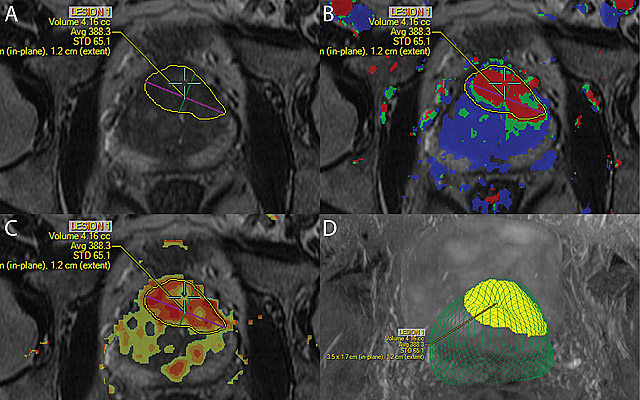

# **Data set **: http://www.stat.cmu.edu/~ryantibs/statcomp-S18/data/pros.dat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/procetat_cancer.csv')
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


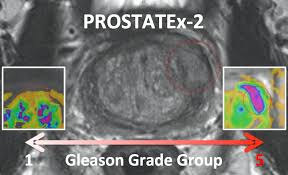

In [ ]:
df.tail()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509
96,3.471966,3.974998,68,0.438255,1,2.904165,7,20,5.582932


In [ ]:
df.shape

(97, 9)

In [ ]:
df.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
lcavol,0
lweight,0
age,0
lbph,0
svi,0
lcp,0
gleason,0
pgg45,0
lpsa,0


In [ ]:
df.isnull().sum()

,0
lcavol,0
lweight,0
age,0
lbph,0
svi,0
lcp,0
gleason,0
pgg45,0
lpsa,0


In [ ]:
df.isnull().sum()

,0
lcavol,0
lweight,0
age,0
lbph,0
svi,0
lcp,0
gleason,0
pgg45,0
lpsa,0


In [ ]:
df.nunique()

,0
lcavol,93
lweight,88
age,31
lbph,42
svi,2
lcp,30
gleason,4
pgg45,19
lpsa,85


In [ ]:
# Selecting object and numerical columns
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

# Function to classify features
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            # Check for low cardinality categorical features
            if df[column].nunique() < 40:
                categorical_features.append(column)
        else:
            non_categorical_features.append(column)
            # Further classify numerical columns
            if df[column].nunique() < 40:  # Assuming discrete means fewer unique values
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return {
        'categorical_features': categorical_features,
        'non_categorical_features': non_categorical_features,
        'discrete_features': discrete_features,
        'continuous_features': continuous_features
    }

# Example of using the function
classified_features = classify_features(df)
print("\nCategorical Features:")
print(classified_features['categorical_features'])

print("\nNon-Categorical Features:")
print(classified_features['non_categorical_features'])

print("\nDiscrete Features:")
print(classified_features['discrete_features'])

print("\nContinuous Features:")
print(classified_features['continuous_features'])


Object type columns:
Index([], dtype='object')

Numerical type columns:
Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')

Categorical Features:
[]

Non-Categorical Features:
['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa']

Discrete Features:
['age', 'svi', 'lcp', 'gleason', 'pgg45']

Continuous Features:
['lcavol', 'lweight', 'lbph', 'lpsa']


age
age
68    12
63     7
64     7
65     7
66     6
69     5
60     5
61     5
72     4
70     4
58     4
59     3
67     3
62     3
50     2
77     2
73     2
47     2
57     2
41     1
74     1
54     1
71     1
79     1
56     1
49     1
43     1
78     1
76     1
44     1
52     1
Name: count, dtype: int64

svi
svi
0    76
1    21
Name: count, dtype: int64

lcp
lcp
-1.386294    45
-0.430783     6
-0.798508     5
 0.810930     3
 1.321756     3
-0.597837     2
 0.048790     2
 1.178655     2
 2.327278     2
 0.223144     2
 1.909542     2
 1.558145     2
 0.500775     2
 0.371564     2
 2.463853     2
-0.162519     1
 2.656757     1
 1.658228     1
 1.619388     1
 1.348073     1
 1.832581     1
 1.446919     1
 2.420368     1
 2.110213     1
 0.559616     1
 2.583998     1
 1.749200     1
 0.300105     1
 2.169054     1
 2.904165     1
Name: count, dtype: int64

gleason
gleason
7    56
6    35
9     5
8     1
Name: count, dtype: int64

pgg45
pgg45
0      35
20      9
60      8
40 

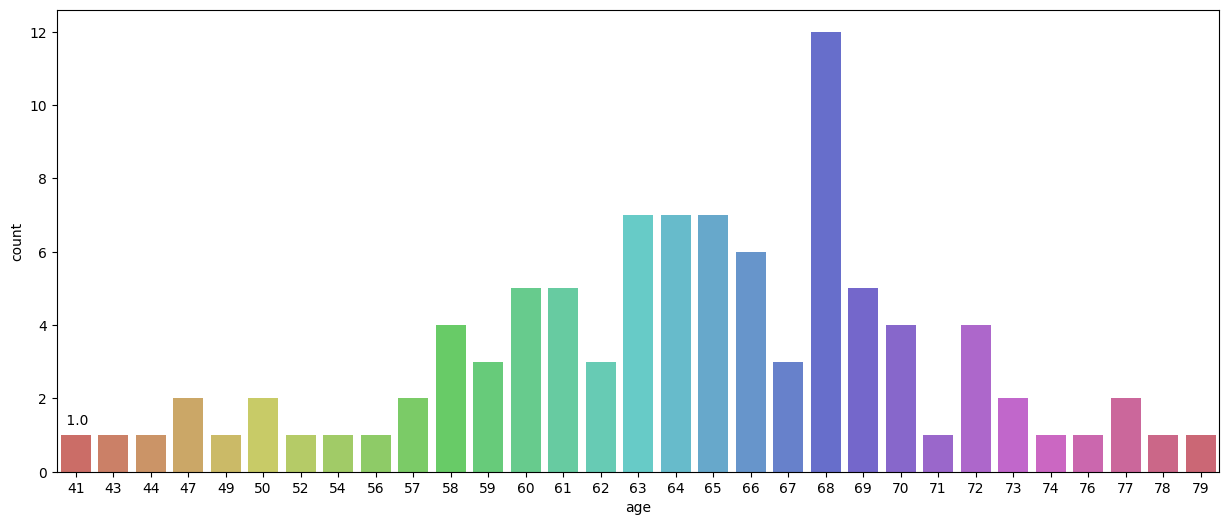

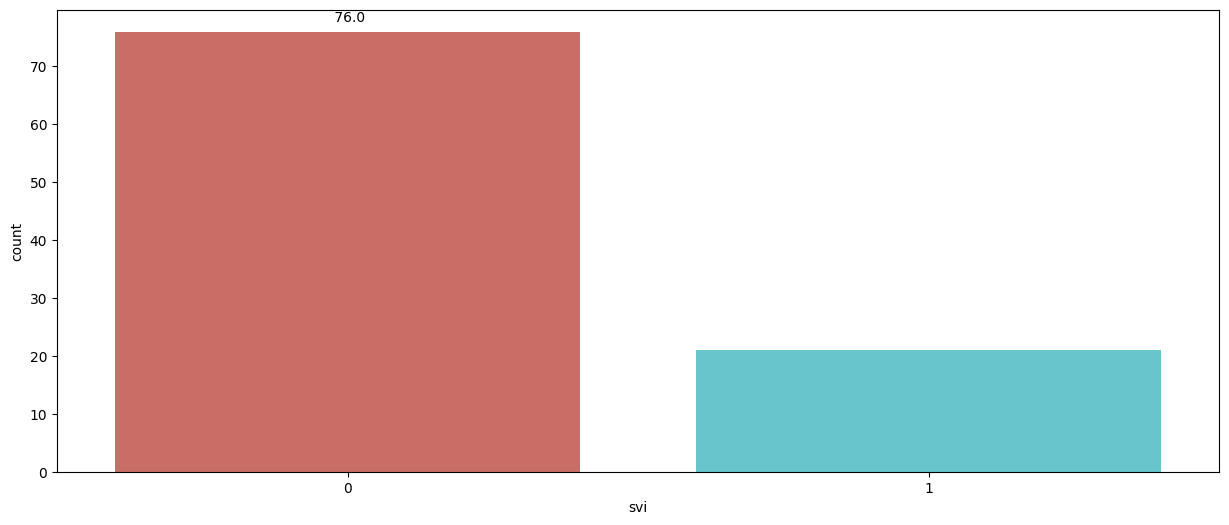

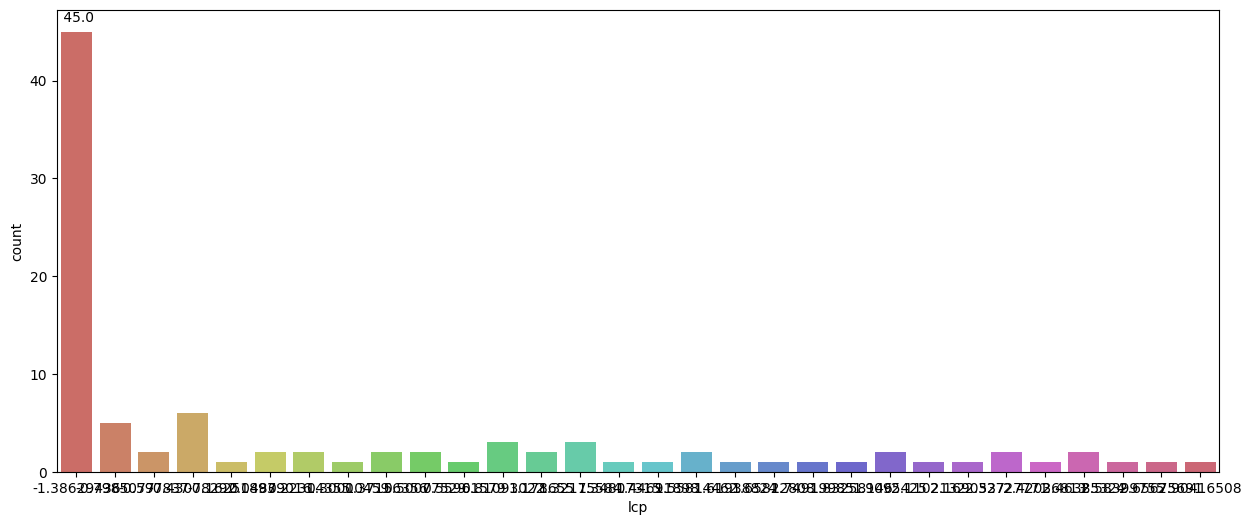

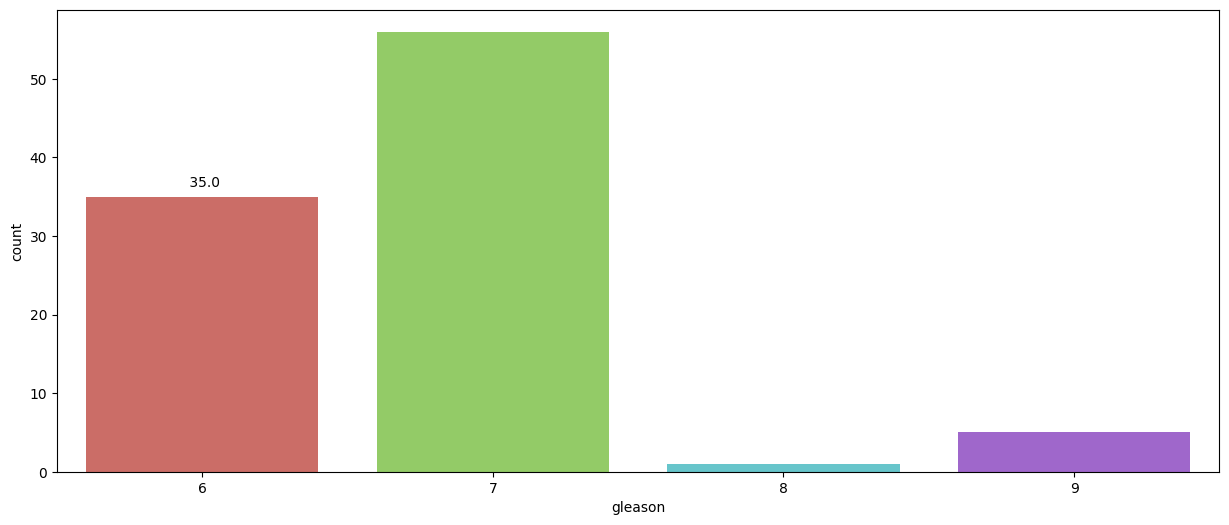

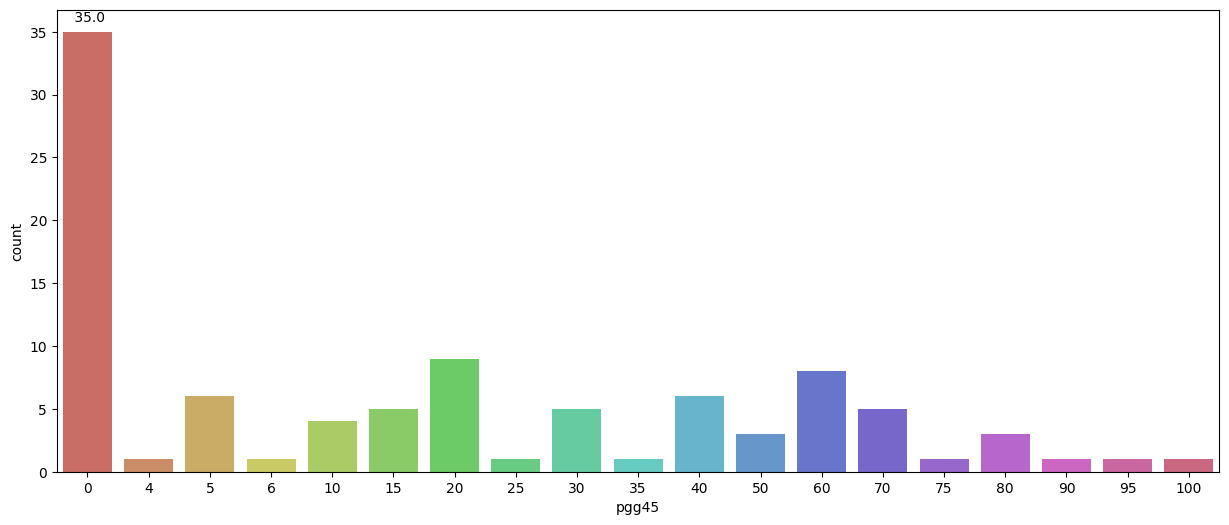

In [ ]:
# ... (previous code from ipython-input-10-98f10210a75e) ...

# Access the 'discrete_features' list from the 'classified_features' dictionary
discrete_features = classified_features['discrete_features']

for i in discrete_features:  # Change 'discrete' to 'discrete_features'
    print(i)
    print(df[i].value_counts())
    print()

for i in discrete_features:  # Change 'discrete' to 'discrete_features'
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f' {height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')
        plt.show()

In [ ]:
import plotly.express as px

# Assuming 'discrete_features' was defined earlier, you can loop through it:
for i in discrete_features:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

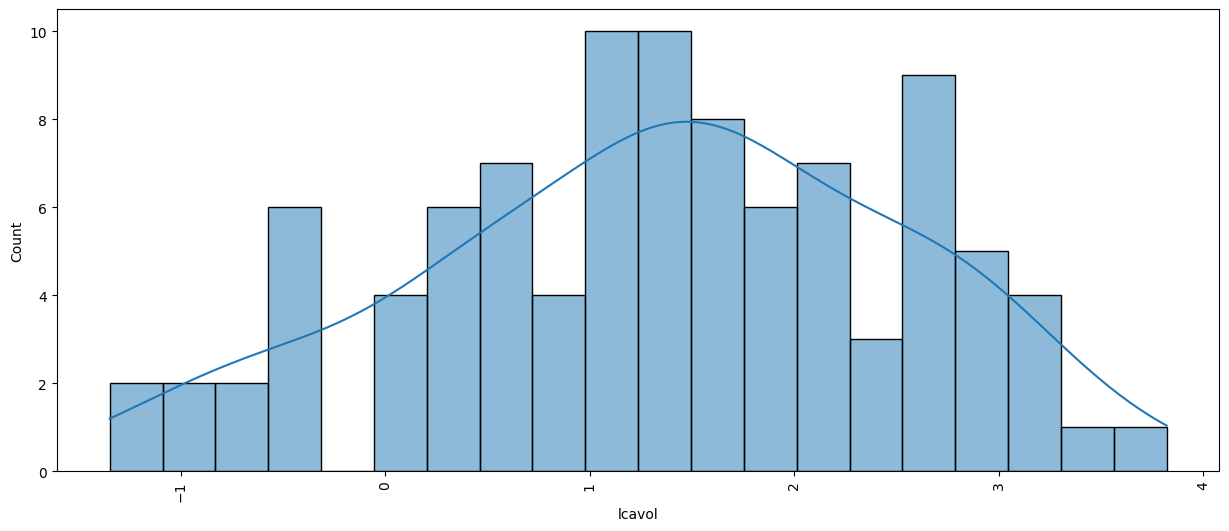

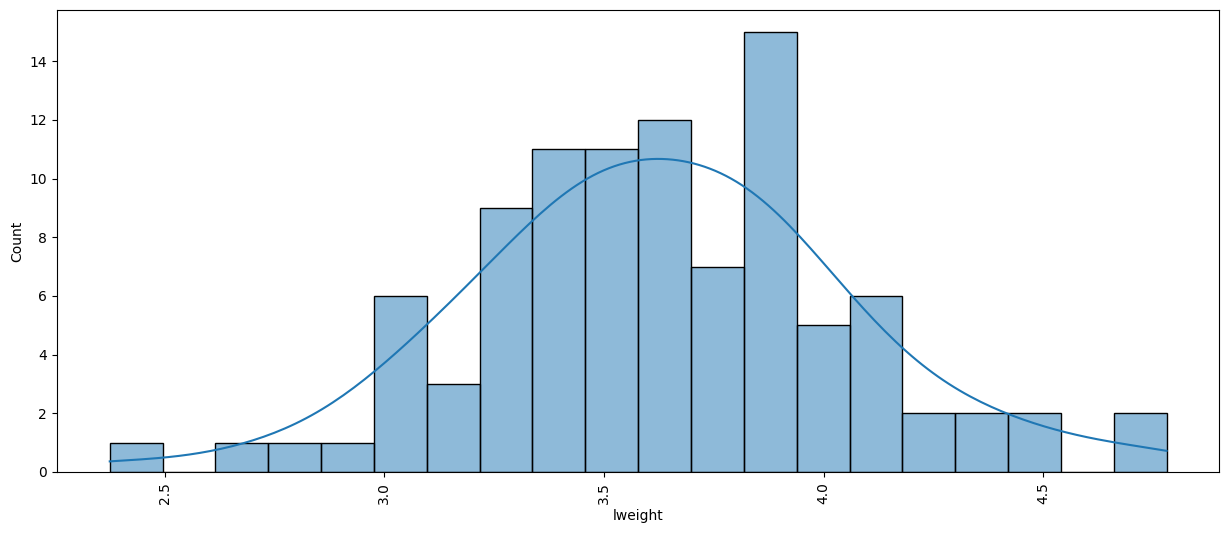

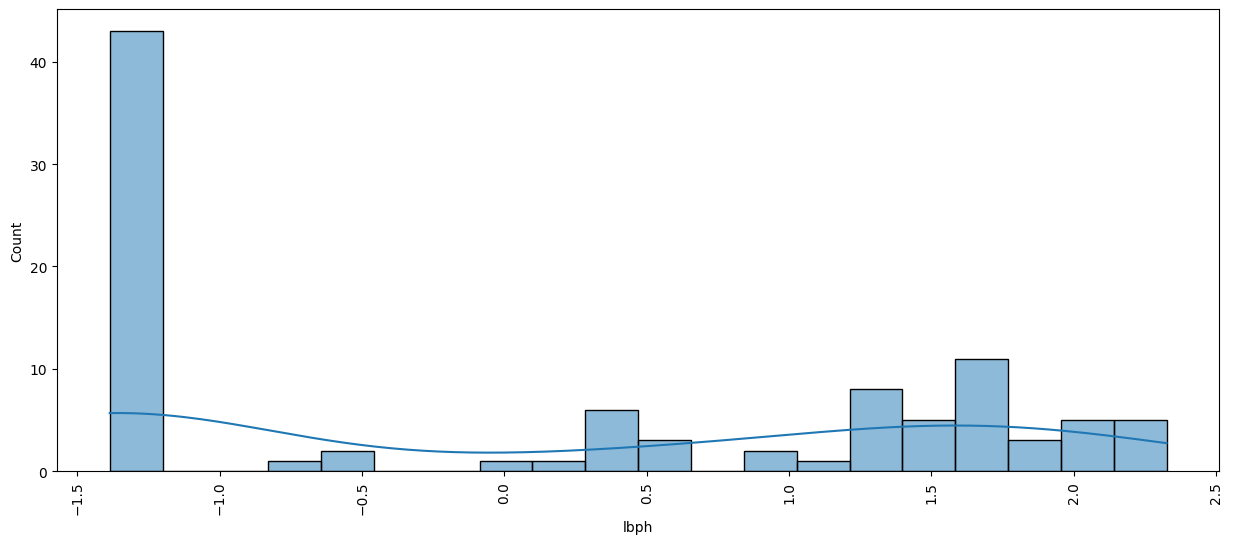

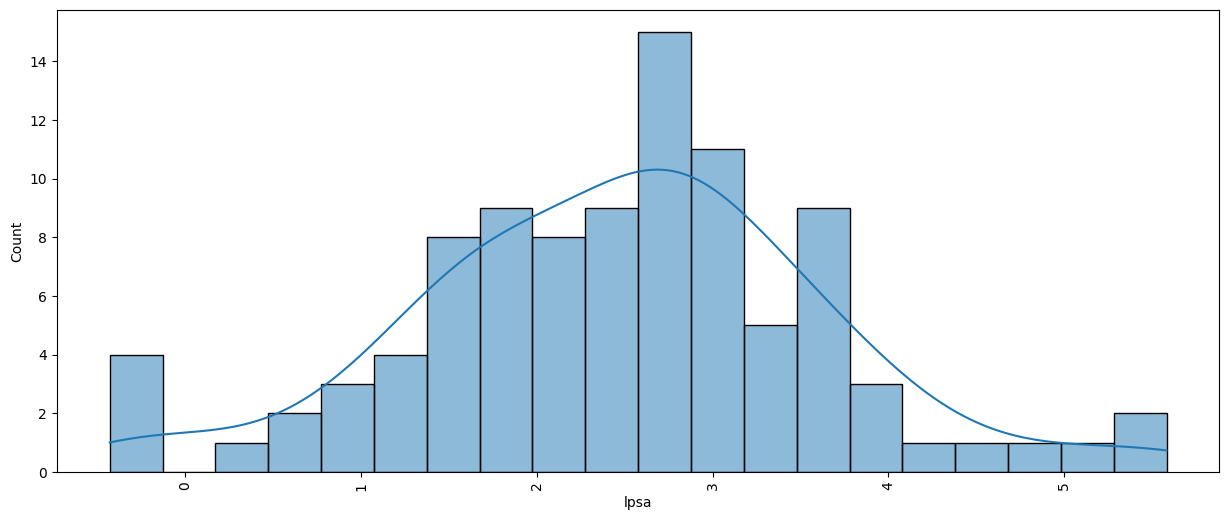

In [ ]:
# ... (previous code) ...

# Assuming 'classified_features' from classify_features function
continuous = classified_features['continuous_features']

for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.histplot(df[i], bins=20, kde=True, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

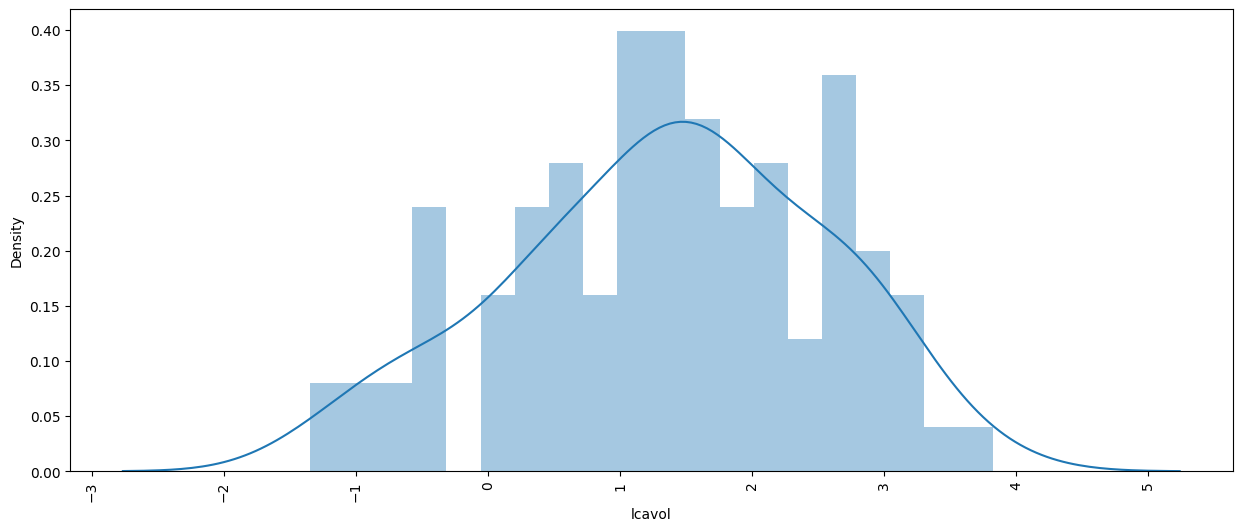

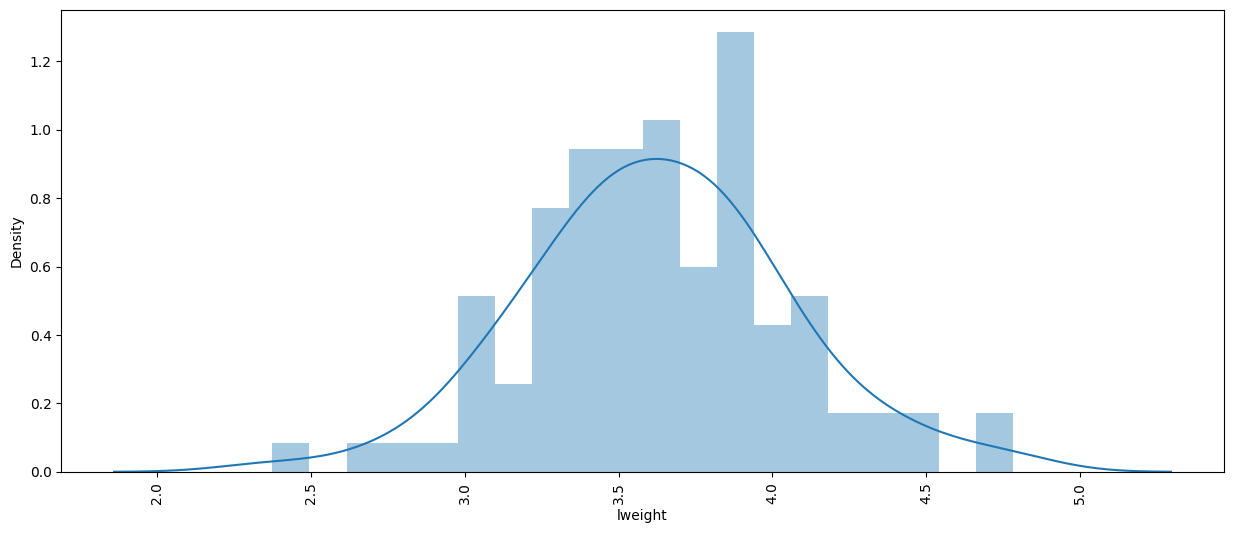

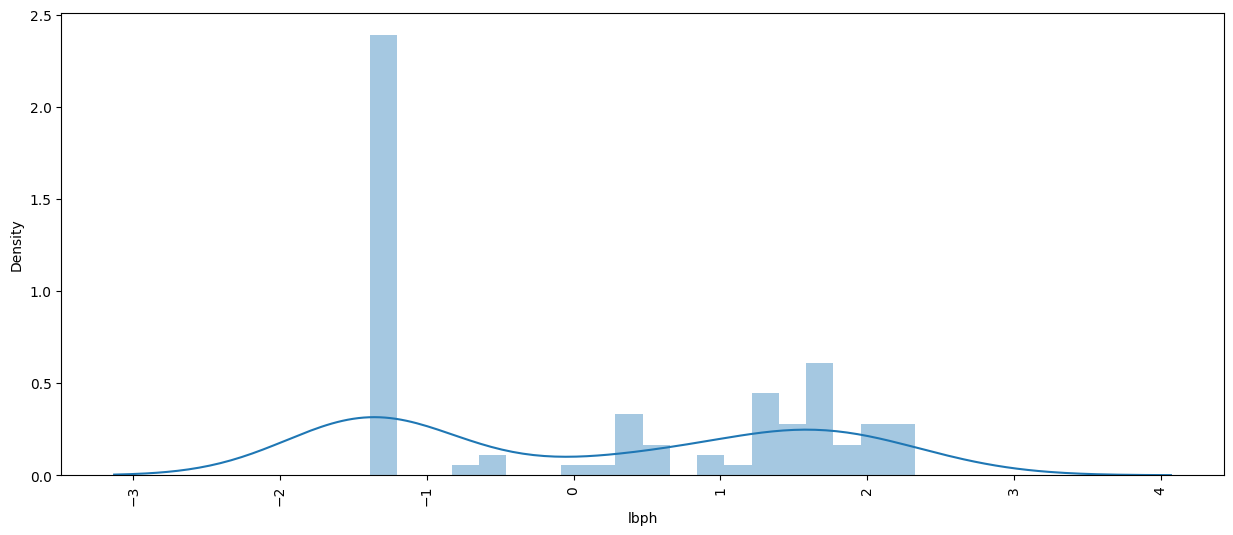

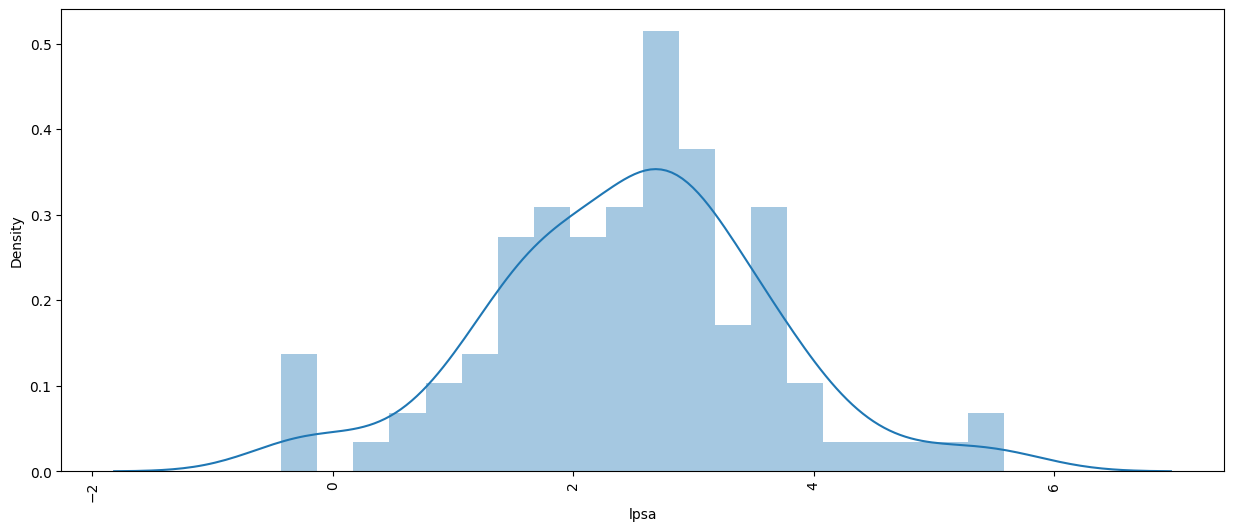

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.distplot(df[i], bins=20, kde=True)
    plt.xticks(rotation=90)
    plt.show()

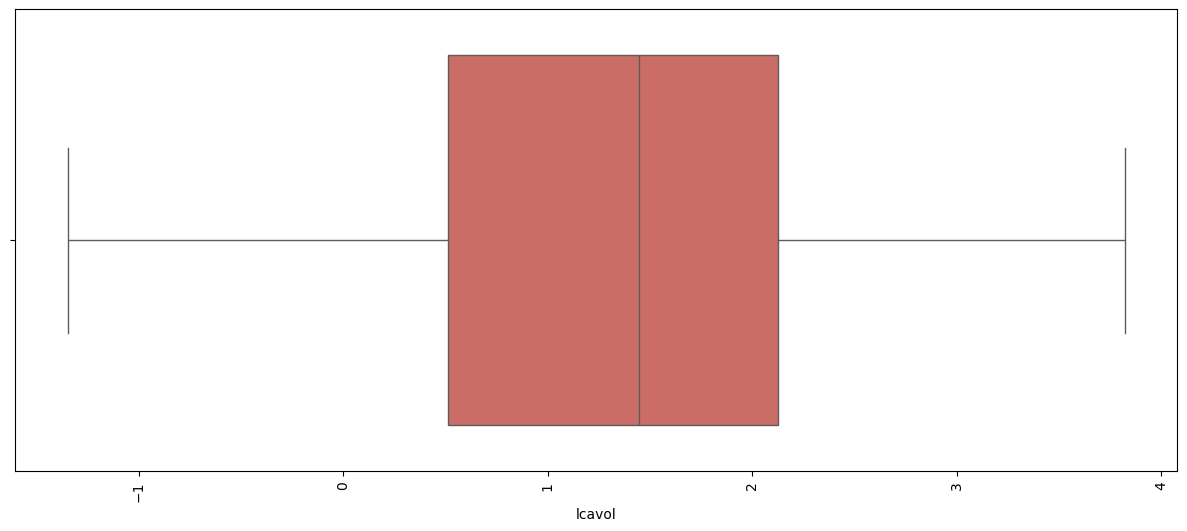

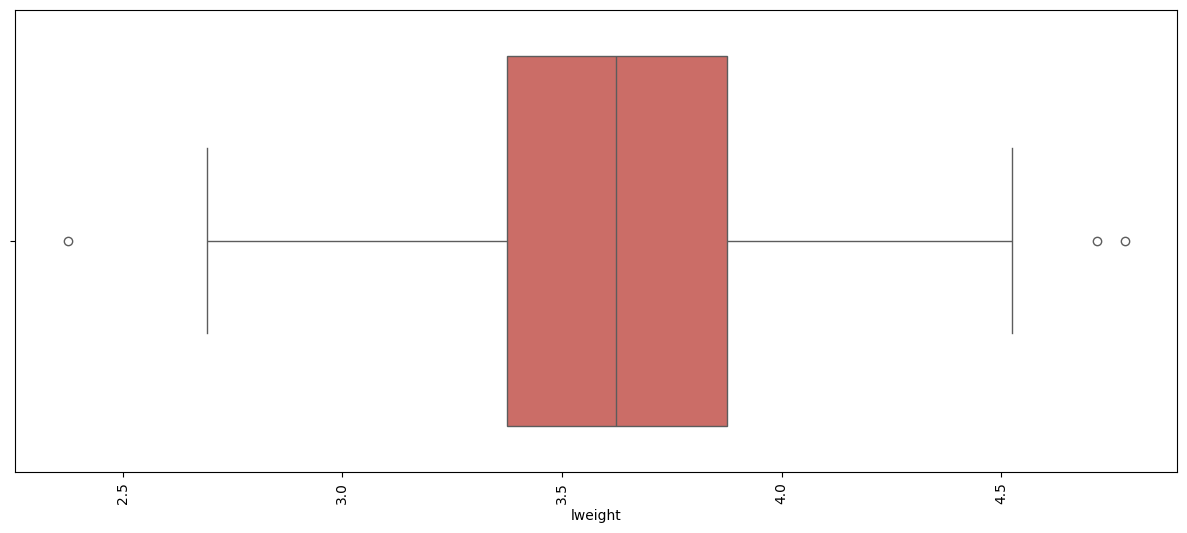

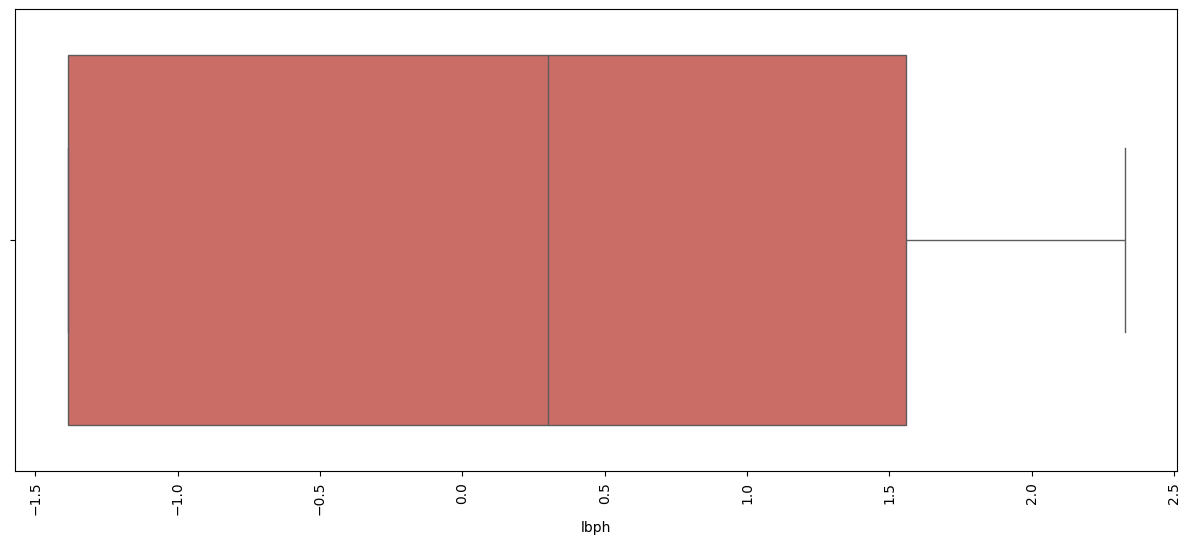

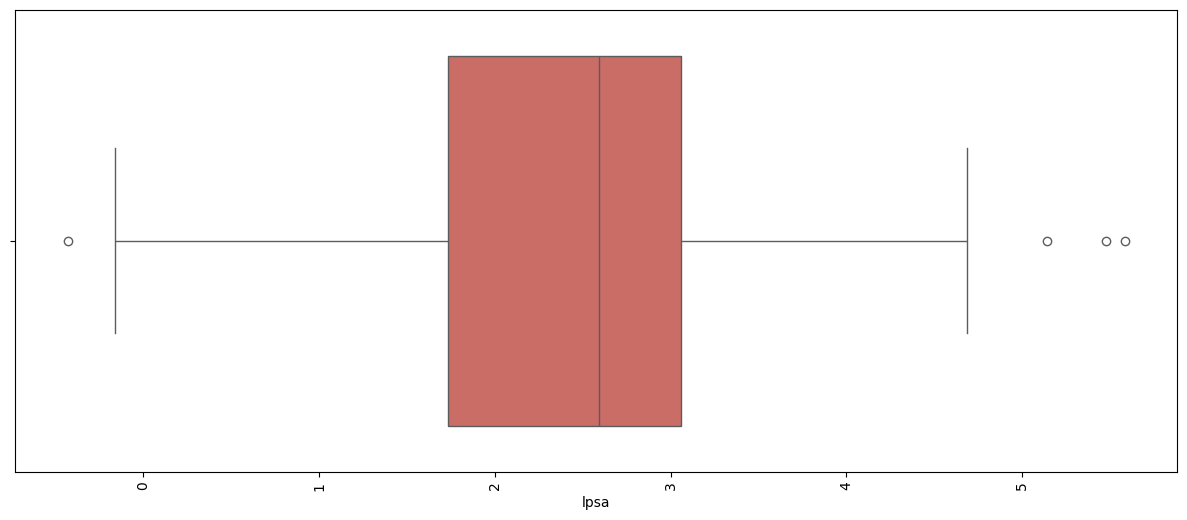

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

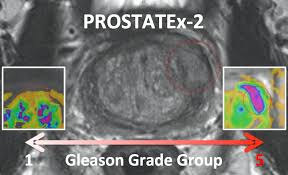

Columns after stripping: Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')
     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564
'lcavol': 6
'lweight': 7
'age': 3
'lbph': 4
'svi': 3
'lcp': 3
'gleason': 7
'pgg45': 5
'lpsa': 4


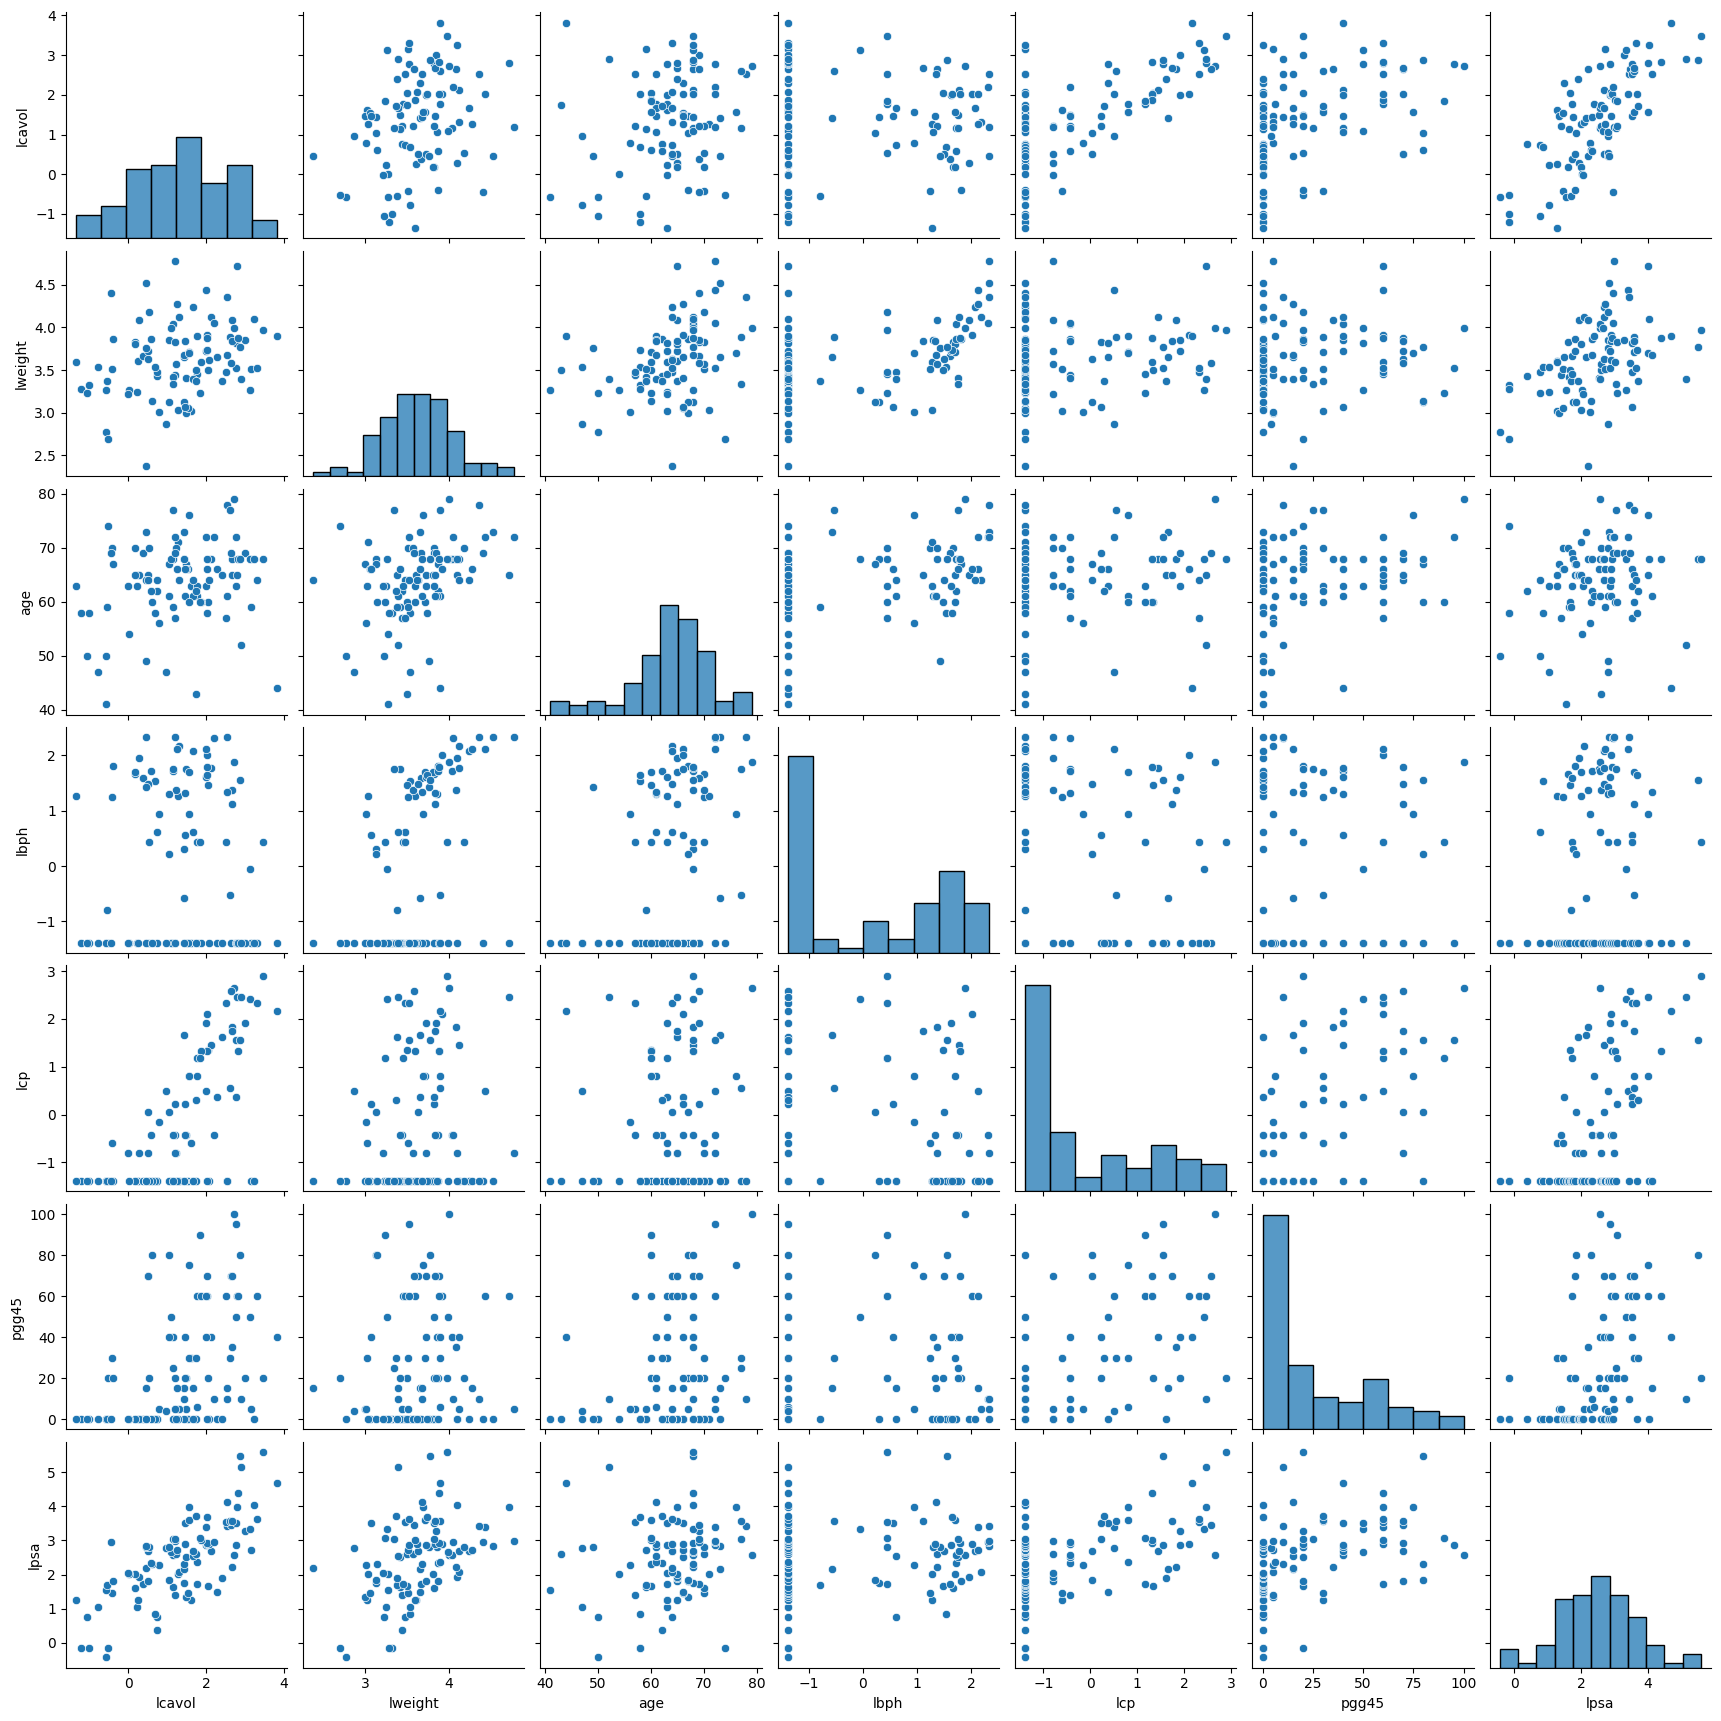

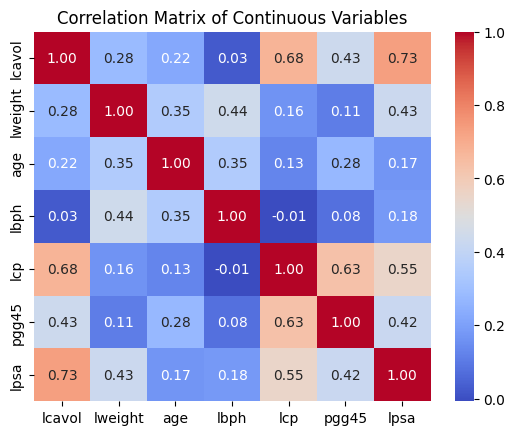

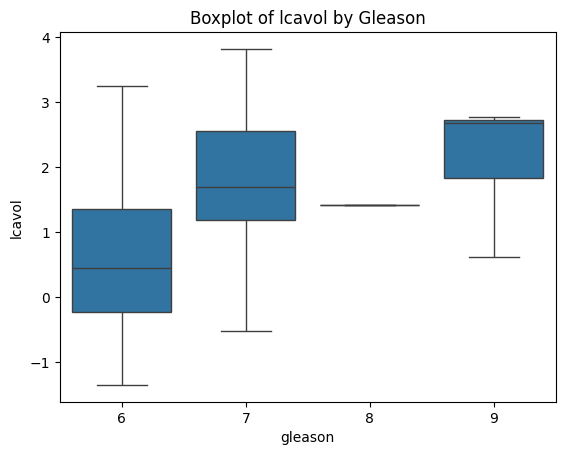

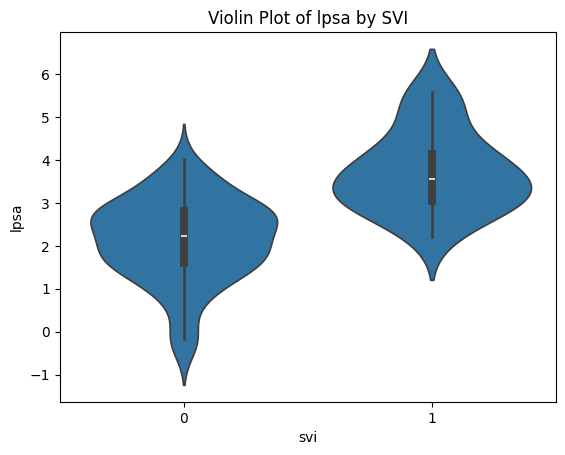

Chi-Square Test result: 
 Chi2: 15.917698263515934 
 P-value: 0.0011789029168086315


In [ ]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify if 'gleason' is present after stripping
print("Columns after stripping:", df.columns)

# Check the first few rows of the DataFrame
print(df.head())

# Check lengths of column names to identify hidden characters
for col in df.columns:
    print(f"'{col}': {len(col)}")

# Importing necessary libraries for visualization and statistical analysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

# Visualizing pairwise relationships between selected numerical variables
sns.pairplot(df[['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa']])
plt.show()

# Calculate and visualize the correlation matrix of continuous variables
correlation_matrix = df[['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

# Create a boxplot for 'lcavol' grouped by 'gleason'
if 'gleason' in df.columns:
    sns.boxplot(x='gleason', y='lcavol', data=df)
    plt.title('Boxplot of lcavol by Gleason')
    plt.show()
else:
    print("'gleason' column not found in DataFrame.")

# Create a violin plot for 'lpsa' grouped by 'svi'
if 'svi' in df.columns:
    sns.violinplot(x='svi', y='lpsa', data=df)
    plt.title('Violin Plot of lpsa by SVI')
    plt.show()
else:
    print("'svi' column not found in DataFrame.")

# Perform Chi-Square Test on the contingency table of 'svi' and 'gleason'
if 'svi' in df.columns and 'gleason' in df.columns:
    contingency_table = pd.crosstab(df['svi'], df['gleason'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test result: \n Chi2: {chi2} \n P-value: {p}")
else:
    print("Required columns for Chi-Square Test ('svi' and 'gleason') not found in DataFrame.")


In [ ]:
from scipy.stats import chi2_contingency
# Ensure column names are correct by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Verify if 'svi' and 'gleason' are present after stripping
print(df.columns)  # Check if 'svi' and 'gleason' are in the output

# Now, the crosstab should work
contingency_table = pd.crosstab(df['svi'], df['gleason'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test result: \n Chi2: {chi2} \n P-value: {p}")

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')
Chi-Square Test result: 
 Chi2: 15.917698263515934 
 P-value: 0.0011789029168086315


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X = df[['age', 'lcavol', 'lweight', 'lbph', 'lcp', 'pgg45', 'gleason', 'svi']]
y = df['lpsa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 0.3469917891761415
R2: 0.7575175130204971


In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)

y_class = (df['lpsa'] > df['lpsa'].median()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

Cross-validation scores: [ -2.72289892 -15.82069677 -13.35607845 -13.94591114  -2.82572164]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_class = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_class))

Accuracy: 0.8


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(df[['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'pgg45', 'gleason', 'svi']])
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)

  Features         VIF
0    const  345.714819
1   lcavol    2.102650
2  lweight    1.453326
3      age    1.336099
4     lbph    1.385040
5      lcp    3.097954
6    pgg45    2.974075
7  gleason    2.468891
8      svi    1.955928


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class AttentionLayer(layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.query_dense = layers.Dense(self.units)
        self.key_dense = layers.Dense(self.units)
        self.value_dense = layers.Dense(self.units)

    def call(self, inputs):
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)


        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = attention_scores / tf.sqrt(float(self.units))
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output

def build_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(64, activation='relu')(inputs)
    x = AttentionLayer(64)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(1)(x)
    model = models.Model(inputs, x)
    return model

model = build_model((X_train.shape[1],))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
validation_data=(X_test, y_test))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 300.7364 - val_loss: 46.0986
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 42.7096 - val_loss: 5.2586
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3525 - val_loss: 0.9142
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1371 - val_loss: 3.0871
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0697 - val_loss: 1.7345
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2256 - val_loss: 0.2687
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3469 - val_loss: 0.5320
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6323 - val_loss: 0.9517
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9808 - val_loss: 0.8731
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8356 - val_loss: 0.4786
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4056 - val_loss: 0.2516
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2501 - val_loss: 0.2870

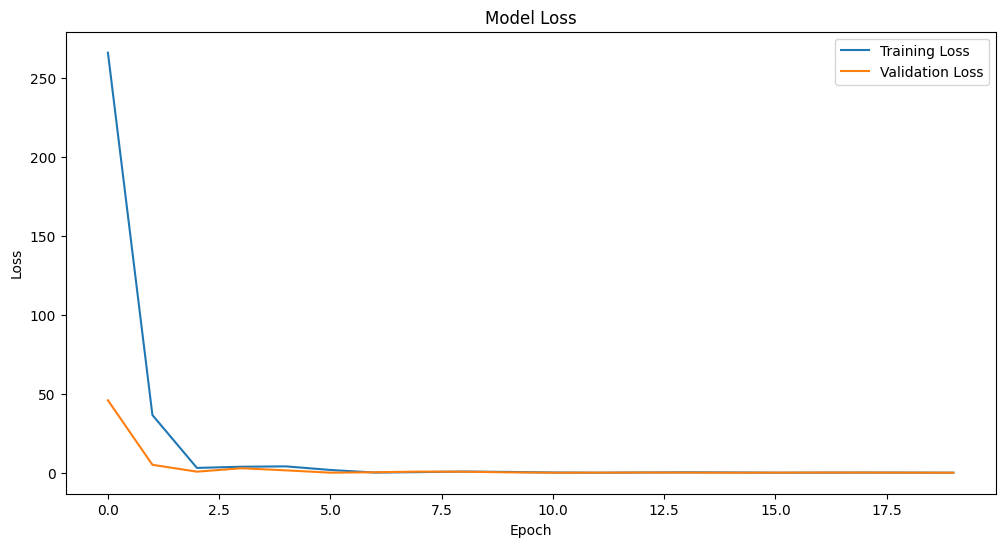

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_r2 = [r2_score(y_train, model.predict(X_train)) for epoch in range(len(history.history['loss']))]
val_r2 = [r2_score(y_test, model.predict(X_test)) for epoch in range(len(history.history['val_loss']))]